# KNN com a base iris

Disciplina: Inteligência Artificial <br/>
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
Desenvolvido por: Nayara Thaiza P. Soares <br/>

**Objetivo: Realizar classificação com o algoritmo knn na base iris** <br/>

In [1]:
#imports
import numpy as np  
import pandas as pd  
import random
import math
import operator
#dados
from sklearn import datasets
#plot
import matplotlib.pyplot as plt



iris = datasets.load_iris()

dataset = pd.DataFrame(iris.data) 
dataset = dataset.astype('float64') # converte para float
dataset.columns = iris.feature_names
dataset['tipo'] = iris.target 



In [2]:
#quantitativo dos dados
observ = len(iris.data)
carac = len(dataset.columns)
print("Numero de observações (linhas): " + str(observ))
print("Numero de caracteristicas: " + str(carac))
dataset.head(10)



Numero de observações (linhas): 150
Numero de caracteristicas: 5


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Text(0, 0.5, 'Sepal Width')

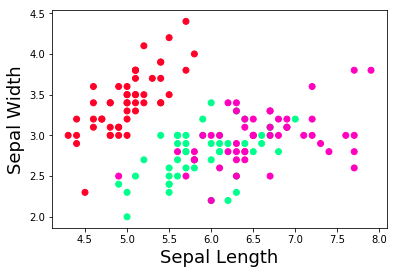

In [6]:
#sepal width e sepal length dos tres tipos de flores
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

**Função: split (responsável por dividir a base entre conjunto de teste e conjunto de treinamento)** <br/>
Divide a base de forma aleatória com apoio do num_split como uma aproximação de proporção dos tamanhos.

In [3]:
#transformando em lista
dataset = dataset.values.tolist()

#dividindo a amostra entre conjunto de treinamento e conjunto de teste
def split(trainingSet, testSet, split_num):
    for i in range(len(dataset)):
        if(random.random() < split_num):
            trainingSet.append(dataset[i])
        else:
            testSet.append(dataset[i])
        
    return trainingSet, testSet

trainingSet = []
testSet = []
split_num = 0.67
split(trainingSet, testSet, split_num);
print("Quantidade no conjunto de treinamento: " + str(len(trainingSet)))
print("Quantidade no conjunto de teste: " + str(len(testSet)))

Quantidade no conjunto de treinamento: 94
Quantidade no conjunto de teste: 56


**Funções: dist_euclidiana (calcula a distância euclidiana entre dois vetores), getNeighbors (retorna vizinhos com maiores semelhanças), getResponse (prevê a resposta com base no voto do vizinho), accuracy (analisa a porcentagem de acerto das predições)** <br/><br/>
**dist_euclidiana:** Dados dois vetores como parametros é calculado a distância euclidiana entre eles.<br/>
**getNeighbors:** Responsável por coletar os vizinhos com maiores semelhanças baseado na distância euclidiana, recebe o vetor de treinamento e uma instância do vetor de teste e um k, que é o número de vizinhos retornados. <br/>
**getResponse:** Pega os vizinhos selecionados, e realiza uma votação para predizer qual deve ser a resposta do objeto classificado (no nosso exemplo, o tipo de flor). <br/>
**accuracy:** Recebe como parâmetro o conjunto de teste e o resultado da votação baseada nos vizinhos e verifica a porcentagem de acerto.



In [4]:
# Distância Euclidiana
def dist_euclidiana(v1, v2):
    dim = len(v2)
    soma = 0
    # loop sem pegar a última coluna pq é a saída (dim - 1)
    for i in range(dim - 1):
        soma += math.pow(v1[i] - v2[i], 2)
    return math.sqrt(soma)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = dist_euclidiana(testInstance, trainingSet[x])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def accuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

**Chamando as funções e apresentando os resultados**

In [5]:
k = 3
predicoes = []
for x in range(len(testSet)):
    vizinhos=getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(vizinhos)
    predicoes.append(result)
    print('> previsto = ' + repr(result) + ', atual = ' + repr(testSet[x][-1]))
accurac = accuracy(testSet, predicoes)
print(" ")
print('Porcentagem de acerto: ' + repr(accurac) + '%')


> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto

**Conclusão** <br/>
É possível perceber que, como os conjuntos de teste e treinamento são definidos aleatoriamente, não há como prever a quantidade de vizinhos (k) que dê o melhor resultado. Entretanto, após alguns testes, rodando novos conjuntos e simulando quantidade de vizinhos, temos que para 1 < k < 6 quase sempre tem uma previsão acima de 90% de acerto. <br/><br/>

**Referências** <br/>
https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e  <br />
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

